## **HW 1**

In [ ]:
import random
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
def pi(arr):
    if len(arr)==1:
        return arr[0]
    else:
        a=arr[-1]
        result=a*pi(arr[:-1])
        return result

In [ ]:
xseq1=[0.5,0.5,1,1.5,1.8,2,2,2,2,2]; # pi(xseq)=20 에서 너무 벗어나지 않도록 임의로 설정
xseq2=[0.5,0.5,1,1.5,1.8,2,2,2,2,2]; # pi(xseq)=20 에서 너무 벗어나지 않도록 임의로 설정
x1history1=[]; # x1 sampling history of way1
x1history2=[]; # x1 sampling history of way2
pixhistory1=[]; # pix sampling history of way1
pixhistory2=[]; #pix sampling history of way2

In [ ]:
#way 1
for i in range(10000):
    for j in range(10):
        xjcandidate=random.expovariate(1); #xj 를 exp 에서 후보 뽑기
        xseqcandidate=xseq1; #x(j-1) 까지 업데이트 되었던 xseq 가져오기
        xseqcandidate[j]= xjcandidate; #[x1,x2,,,,xj,,,,x10] 후보 새롭게 구성
        if pi(xseqcandidate)>20: #새롭게 구성한 [x1,x2,,,,xj,,,,x10] pi 값 확인
            xseq1=xseqcandidate; #20이 넘는다면 후보를 accept
        else:
            while pi(xseqcandidate)<=20: #pi 가 20이 안 넘으면 넘을때까지...
                xjcandidate= random.expovariate(1);
                xseqcandidate[j]=xjcandidate;
            xseq1=xseqcandidate; #넘었으니 accept
    x1history1.append(xseq1[0]); #x1~x10 까지 전부 업데이트한 xseq 을 sampling 으로 accept, 그중 x1 sampling 모으기
    pixhistory1.append(pi(xseq1)); #pi x sampling 모으기

In [ ]:
#way 2
for k in range(10000):
    for l in range(10):
        xother=xseq2[:l]+xseq2[l+1:];
        piother=pi(xseq2); #xl 빼고 나머지 값들의 곱
        minimum=20/piother; #xl 이 가질수 있는 최솟값
        xseq2[l]=st.expon.rvs(minimum) # st.expon.rvs(a) = random sampling of f(x)=exp(-(x-a)), x>=a
    x1history2.append(xseq2[0]); #x1~x10 까지 전부 업데이트한 xseq 을 sampling 으로 accept, 그중 x1 sampling 모으기
    pixhistory2.append(pi(xseq2)); #pi x sampling 모으기

In [ ]:
x1history1=x1history1[:9500];
pixhistory1=pixhistory1[:9500];
x1history2=x1history2[:9500];
pixhistory2=pixhistory2[:9500];

In [ ]:
xaxis=[];
for k in range(9500):
    xaxis.append(k+1)

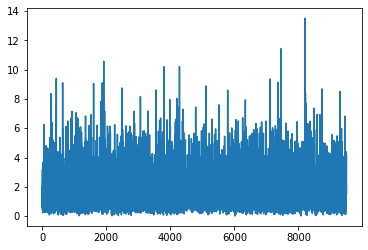

In [ ]:
plt.plot(xaxis,x1history1);

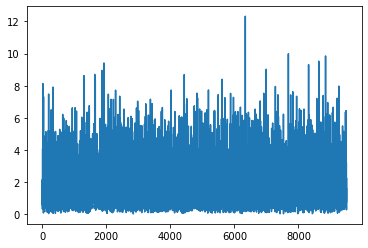

In [ ]:
plt.plot(xaxis,x1history2);

1.9212684622276386


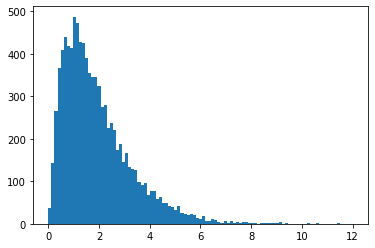

In [ ]:
mean1=sum(x1history1)/len(x1history1)
print(mean1)
xaxis=np.linspace(0,12,100)
plt.hist(x1history1, bins=xaxis);

1.8790737521397594


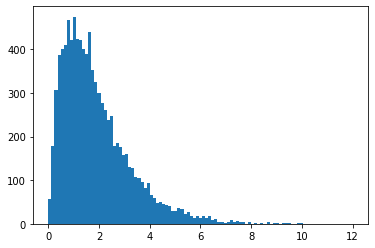

In [ ]:

mean2=sum(x1history2)/len(x1history2)
print(mean2)
plt.hist(x1history2, bins=xaxis);

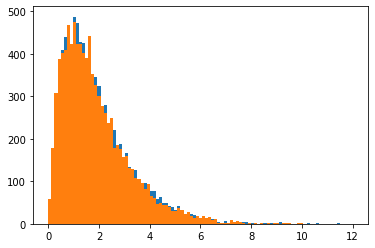

In [ ]:
plt.hist(x1history1, bins=xaxis);
plt.hist(x1history2, bins=xaxis);

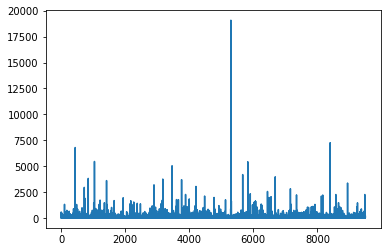

In [ ]:
plt.plot(pixhistory1);

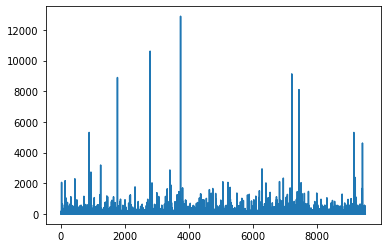

In [ ]:
plt.plot(pixhistory2);

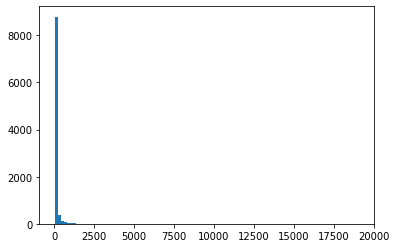

In [ ]:

plt.hist(pixhistory1, bins=100);

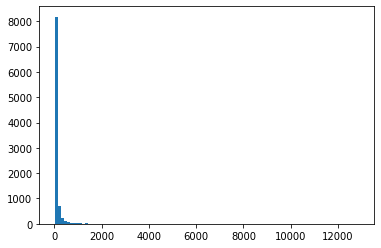

In [ ]:

plt.hist(pixhistory2, bins=100);


## **HW2. Algorithm Comparison**

https://chi-feng.github.io/mcmc-demo/

https://arogozhnikov.github.io/2016/12/19/markov_chain_monte_carlo.html

https://towardsdatascience.com/can-you-do-better-sampling-strategies-with-an-emphasis-on-gibbs-sampling-practicals-and-code-c97730d54ebc

**0. Gibbs Sampling**

**Pros**

- joint dist는 바로 그리기엔 복잡할 수 있지만, 조금 덜 복잡한 conditional dist에서 바로 sampling을 할 수 있음

- conditional dist가 joint dist에 비해 낮은 차원을 가지고 있고, 다른 sampling 기법들을 적용하기에 더욱 알맞을 수 있음

**Cons**

- Gibbs sampler를 쓰기 위해선 각각의 변수들에 대한 posterior conditional들을 찾을 수 있어야 함

- 변수들간의 correlation이 증가할 수록 Gibbs sampler의 성능은 떨어짐

- conditional dist를 뽑아냈어도 알려진 형태가 아닐 수 있기에 이를 기반으로 그림을 못 그릴 수도 있음

- 여러개의 conditional dist에서 뽑아내 그리는 것이 느리고 비효율적일 수 있음

**1. MH Algorithm**

**Pros**

- 적용하기 매우 간편함, condtional dist를 결정할 필요가 없음

- correlation이 높거나 고차원의 분포들로부터도 괜찮게 sampling이 가능함

**Cons:** 
- step size $\sigma$가 너무 크면 reject되는 sample이 많아짐, 반면 $\sigma$가 너무 작으면 매우 적은 step을 만들어서 분포를 explore하는데 긴 시간이 걸리게 됨. (= step size $\sigma$에 민감함)

- 고차원의 공간에서는 MH 알고리즘의 Random-walk 성질 때문에 그 공간을 매우 비효율적으로 돌아다님

- isolated local minimum들 사에에 있는 긴 거리($\sigma$보다 매우 큰)를 돌아다닐 수 없음

- multi-modal dist에서 조금 힘듦

**2. Hamiltonian Monte Carlo**

- gradient도 함께 사용함 -> gradient가 존재하는 케이스에만 활용할 수 있음

- 연속적으로 생성되는 점 사이의 거리가 보통 크기 때문에, representative sampling을 얻기 위해 드는 iteration 수가 적음

- 하나의 iteration을 하는 데에 드는 '비용'이 더 높지만, 그럼에도 불구하고 HMC는 더 효율적임

- 대부분의 new state를 accept함

- 여전히 isolated local minumum들이 있는 분포에서 sampling 하는 것은 어려움





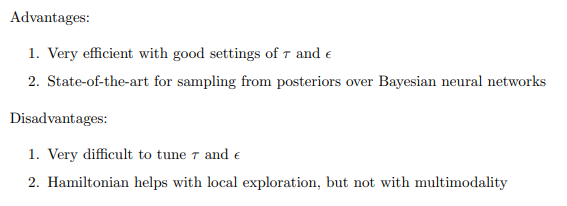

**3. No-U-Turn Sampler**

- Hamiltonian Monte Carlo 알고리즘의 변주 

- HMC가 desired number of steps parameter L ($\epsilon$은 step size parameter) 에 의존하는 것을 없애주면서 여전히 HMC처럼 독립적인 sample들을 효율적으로 만들어냄

- 참고: Matthew D.Hoffman et al.(2014) ,**The No-U-Turn Sampler: Adaptively Setting Path Lengths
in Hamiltonian Monte Carlo**

## **HW3. Pi**

In [ ]:
import numpy as np
from scipy.stats import uniform, expon, gaussian_kde
import matplotlib.pyplot as plt

In [ ]:
def plotting(n):
  x = uniform.rvs(loc=-1, scale =2, size = n)
  y = uniform.rvs(loc =-1, scale=2, size = n)
  x_accepted = []
  y_accepted = []
  x_rejected = []
  y_rejected = []

  for i in range(n):
    if x[i]**2 + y[i]**2 <1 :
      x_accepted.append(x[i])
      y_accepted.append(y[i])

    else:
      x_rejected.append(x[i])
      y_rejected.append(y[i])

  fig, axis = plt.subplots(1,1, figsize=(10,10))     
  circle = plt.Circle((0,0),1, fill=False)
  axis.plot(x_accepted, y_accepted, '.', color = 'green')
  axis.plot(x_rejected, y_rejected, 'x', color = 'red') 
  axis.set_xlim([-1.5,1.5])
  axis.set_ylim([-1.5,1.5])
  axis.add_artist(circle)
  
  pi = 4 * len (x_accepted) / n

  plt.show()
  print('pi = ', pi)
  print('n =',n)

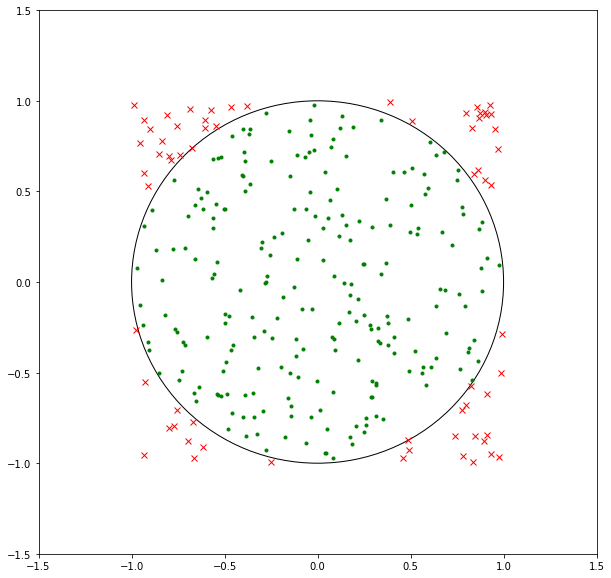

pi =  3.12
n = 300


In [ ]:
plotting(300)

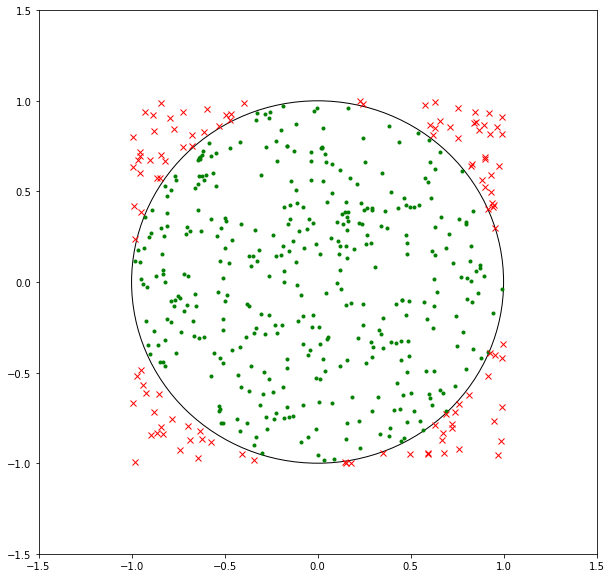

pi =  3.08
n = 500


In [ ]:
plotting(500)

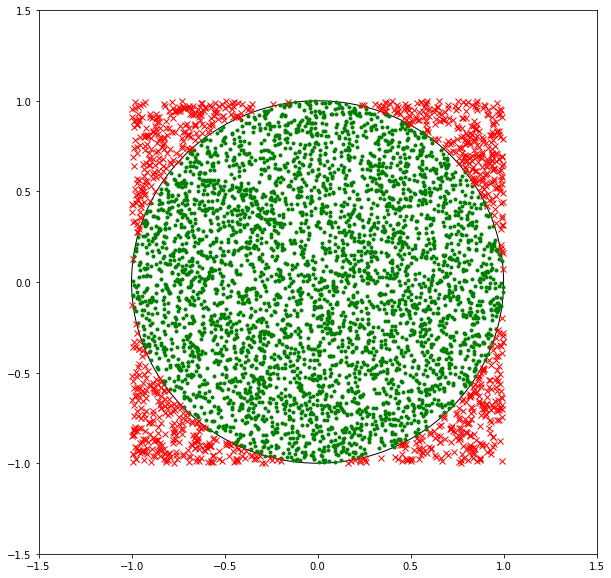

pi =  3.1584
n = 5000


In [ ]:
plotting(5000)

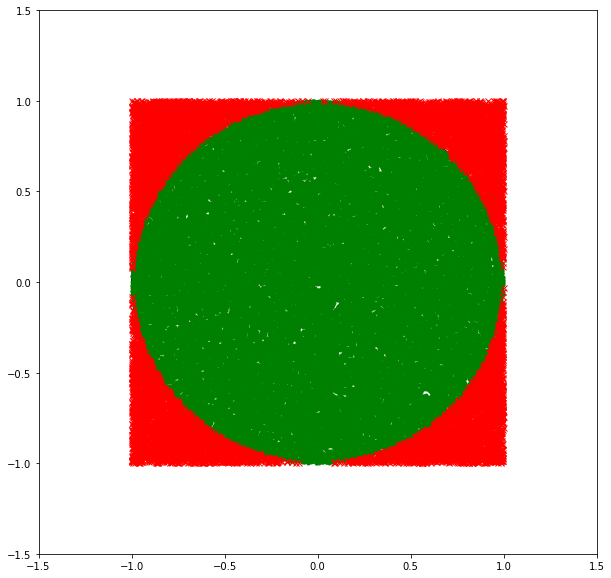

pi =  3.1426666666666665
n = 60000


In [ ]:
plotting(60000)